In [2]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar el archivo Excel
file_path = 'C:/Users/AYACDA23/Downloads/LEADS.xlsx'
df = pd.read_excel(file_path)
# Mostrar las primeras filas del dataframe
df.head()

,Created,Name,Email
0,2023-11-05 19:14:00,hairo Trujillo Gonzales,hairo_2015@outlook.com
1,2023-11-05 19:33:00,Manchita Molle,camucha_901@hotmail.com
2,2023-11-05 20:32:00,Oliver Raul Cutipa Condori,orcutipacondori@gmail.com
3,2023-11-05 20:39:00,Froilan Espetia,espetiafroy@gmail.com
4,2023-11-05 21:17:00,Alexsandra Az,azurinale96@hotmail.com


In [4]:
# Convertir la columna de fechas a datetime si no lo está
df['Created'] = pd.to_datetime(df['Created'])
# Extraer la hora y el día de la semana de la columna de fechas
df['Hora'] = df['Created'].dt.hour
df['DiaSemana'] = df['Created'].dt.day_name()

# Estadísticas descriptivas básicas
print(df.describe())

                             Created         Hora
count                           3543  3543.000000
mean   2024-03-15 14:39:42.032176128    13.643805
min              2023-11-05 19:14:00     0.000000
25%              2024-01-07 21:08:30     9.000000
50%              2024-03-26 21:02:00    14.000000
75%              2024-05-20 07:52:30    19.000000
max              2024-06-25 19:22:00    23.000000
std                              NaN     6.050337


In [17]:
df['Hora']

0       19
1       19
2       20
3       20
4       21
        ..
3538     8
3539     9
3540     9
3541    10
3542    19
Name: Hora, Length: 3543, dtype: int32

In [6]:
# Agrupar por hora y contar la cantidad de leads
horas_recurrencia = df.groupby('Hora').size()
print(horas_recurrencia)

Hora
0      94
1      35
2      18
3      19
4      37
5      88
6     200
7     195
8     176
9     151
10    176
11    147
12    149
13    162
14    179
15    190
16    183
17    199
18    191
19    207
20    200
21    202
22    194
23    151
dtype: int64


In [7]:
# Agrupar por día de la semana y contar la cantidad de leads
dias_recurrencia = df.groupby('DiaSemana').size()
print(dias_recurrencia)

DiaSemana
Friday       502
Monday       489
Saturday     572
Sunday       564
Thursday     466
Tuesday      485
Wednesday    465
dtype: int64


In [8]:
# Ordenar los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_recurrencia = dias_recurrencia.reindex(orden_dias)

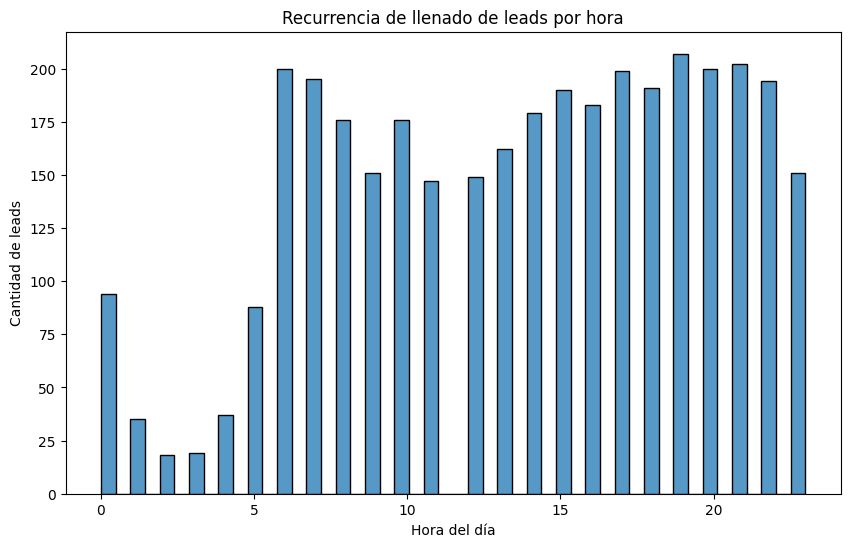

In [9]:
# Visualizar la recurrencia por hora
plt.figure(figsize=(10, 6))
sns.histplot(df,x="Hora", bins=int(24*2), kde=False) #x=horas_recurrencia.index, y=horas_recurrencia.values, palette='viridis')
plt.title('Recurrencia de llenado de leads por hora')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de leads')
plt.show()

C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_7904\4226966295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dias_recurrencia.index, y=dias_recurrencia.values, palette='viridis')


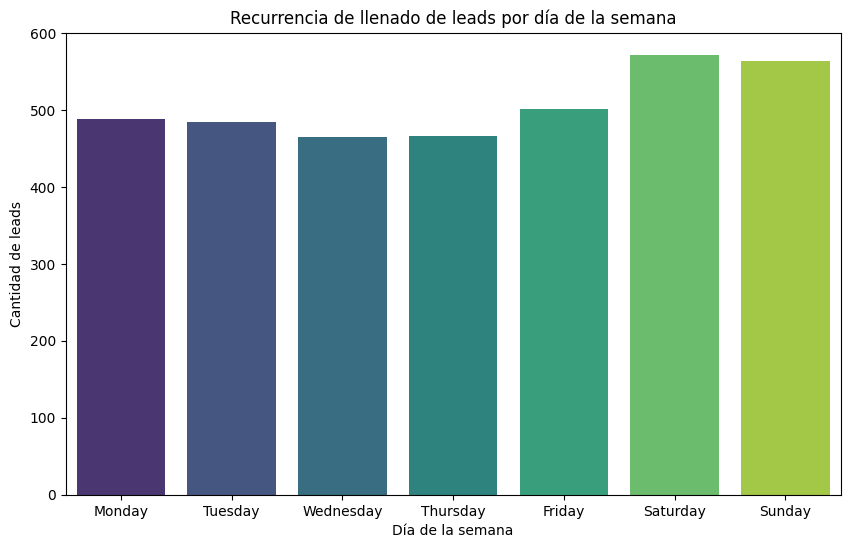

In [10]:
# Visualizar la recurrencia por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x=dias_recurrencia.index, y=dias_recurrencia.values, palette='viridis')
plt.title('Recurrencia de llenado de leads por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de leads')
plt.show()

In [11]:
df['Hora'] = df['Created'].dt.hour
df['Minuto'] = df['Created'].dt.minute
df['DiaSemana'] = df['Created'].dt.day_name()

# Crear intervalos de 30 minutos y 15 minutos
df['Intervalo30Min'] = df['Created'].dt.floor('30T').dt.time
df['Intervalo15Min'] = df['Created'].dt.floor('15T').dt.time

# Agrupar por intervalos de 30 minutos y contar la cantidad de leads
intervalo_30min_recurrencia = df.groupby('Intervalo30Min').size()
print(intervalo_30min_recurrencia)


Intervalo30Min
00:00:00     50
00:30:00     44
01:00:00     19
01:30:00     16
02:00:00      8
02:30:00     10
03:00:00      7
03:30:00     12
04:00:00     16
04:30:00     21
05:00:00     34
05:30:00     54
06:00:00    104
06:30:00     96
07:00:00     89
07:30:00    106
08:00:00     85
08:30:00     91
09:00:00     81
09:30:00     70
10:00:00     94
10:30:00     82
11:00:00     77
11:30:00     70
12:00:00     73
12:30:00     76
13:00:00     79
13:30:00     83
14:00:00     84
14:30:00     95
15:00:00     97
15:30:00     93
16:00:00     89
16:30:00     94
17:00:00    103
17:30:00     96
18:00:00     94
18:30:00     97
19:00:00    103
19:30:00    104
20:00:00     99
20:30:00    101
21:00:00    106
21:30:00     96
22:00:00    105
22:30:00     89
23:00:00     93
23:30:00     58
dtype: int64


C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_7904\238150632.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['Intervalo30Min'] = df['Created'].dt.floor('30T').dt.time
C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_7904\238150632.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['Intervalo15Min'] = df['Created'].dt.floor('15T').dt.time


In [12]:
# Agrupar por intervalos de 15 minutos y contar la cantidad de leads
intervalo_15min_recurrencia = df.groupby('Intervalo15Min').size()
print(intervalo_15min_recurrencia)

Intervalo15Min
00:00:00    30
00:15:00    20
00:30:00    21
00:45:00    23
01:00:00    10
            ..
22:45:00    37
23:00:00    51
23:15:00    42
23:30:00    35
23:45:00    23
Length: 96, dtype: int64


In [13]:
# Agrupar por día de la semana y hora
df['HoraMinuto'] = df['Created'].dt.time
dias_horas = df.groupby(['DiaSemana', 'HoraMinuto']).size().reset_index(name='Cantidad')

# Ordenar los días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_horas['DiaSemana'] = pd.Categorical(dias_horas['DiaSemana'], categories=orden_dias, ordered=True)


C:\Users\AYACDA23\AppData\Local\Temp\ipykernel_7904\1057565581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intervalo_30min_recurrencia.index, y=intervalo_30min_recurrencia.values, palette='viridis')


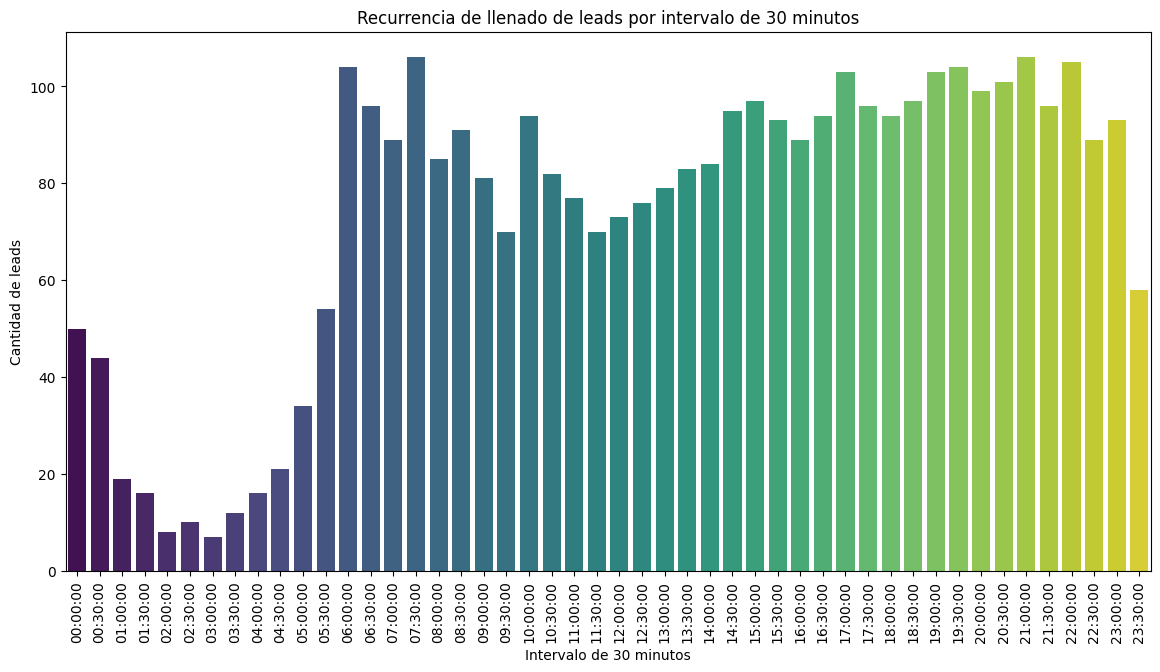

In [14]:
# Visualizar la recurrencia por intervalo de 30 minutos
plt.figure(figsize=(14, 7))
sns.barplot(x=intervalo_30min_recurrencia.index, y=intervalo_30min_recurrencia.values, palette='viridis')
plt.title('Recurrencia de llenado de leads por intervalo de 30 minutos')
plt.xlabel('Intervalo de 30 minutos')
plt.ylabel('Cantidad de leads')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Visualizar la recurrencia por intervalo de 15 minutos
plt.figure(figsize=(14, 7))
sns.hist(x=intervalo_15min_recurrencia.index, y=intervalo_15min_recurrencia.values, palette='viridis')
plt.title('Recurrencia de llenado de leads por intervalo de 15 minutos')
plt.xlabel('Intervalo de 15 minutos')
plt.ylabel('Cantidad de leads')
plt.xticks(rotation=90)
plt.show()


AttributeError: module 'seaborn' has no attribute 'hist'

<Figure size 1400x700 with 0 Axes>

In [ ]:
# Visualizar el gráfico de puntos con días de la semana y horas
plt.figure(figsize=(14, 7))
sns.scatterplot(x='DiaSemana', y='Created', size='Cantidad', data=dias_horas, legend=False, sizes=(20, 2000))
plt.title('Recurrencia de llenado de leads por día de la semana y hora')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import 

In [1]:
value = 2 + 3 * 4 / 2 
print(value)

8.0
